In [17]:
import pandas as pd
import gseapy as gp
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [111]:
df = pd.read_csv('/Users/emmachen/Desktop/hackhigh/results/gsea1_uvm_all.csv')
df.sort_values('pval', inplace=True)
df['num_gene'] = df['gene'].apply(lambda x: len(x.split(';')))

In [112]:
df

,Term,pval,fdr,nes,es,gene,num_gene
0,GO_Biological_Process_2023__Regulation Of Myob...,0.000000,1.000000,-1.713016,-0.802876,ACTL6A;ARID1A;BOC;ARID1B;AKIRIN1;BRD7,6
1,GO_Biological_Process_2023__Response To Organo...,0.000000,0.409401,1.675272,0.891519,DERL1,1
2,GO_Molecular_Function_2023__Cytokine Receptor ...,0.000000,0.290642,1.712755,0.890283,CCR8;CCR5;CCR3;CCR2;CCR4;GFRA2;CCR1;ACKR4,8
3,GO_Biological_Process_2023__Anterograde Trans-...,0.001284,0.564734,1.618483,0.744008,CHRNB3;GABRR3;CHRNA6;CHRNA2,4
4,GO_Biological_Process_2023__Exocytosis (GO:000...,0.001495,0.202274,1.711144,0.878525,CADPS;ARFGEF1;COPS5;EXOC2;ANK1;CCR1;EXOC7;EXOC...,9
...,...,...,...,...,...,...,...
1145,GO_Biological_Process_2023__Establishment Of P...,0.998447,0.998582,0.370614,0.203998,COPG2;GOLPH3;CANX;ARL4D;TANGO2;TVP23B,6
1146,GO_Biological_Process_2023__Cellular Response ...,0.998464,1.000000,0.403018,0.206066,ANGPT4;FMN2;BMP7;BAD;EGLN1;CPEB2;EGLN2;HILPDA,8
1147,GO_Molecular_Function_2023__G Protein-Coupled ...,1.000000,0.999942,-0.319860,-0.137729,GLP1R;CYSLTR1;CRHR1;BDKRB2,4
1148,GO_Biological_Process_2023__Negative Regulatio...,1.000000,0.987233,-0.610376,-0.211078,CTNNBIP1;CNOT1;CCNC;CSNK2A2;GATA4;ADIPOQ;ENPP1...,8


In [118]:
df.sort_values('fdr', inplace=True)
df['Term'][0]

'GO_Biological_Process_2023__Regulation Of Myoblast Differentiation (GO:0045661)'

/var/folders/_r/m8cfn2r56gl41szmtj63xgmw0000gn/T/ipykernel_6897/574018136.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='nes', y='Term', data=df_vis, palette=colors)
/var/folders/_r/m8cfn2r56gl41szmtj63xgmw0000gn/T/ipykernel_6897/574018136.py:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  bars = sns.barplot(x='nes', y='Term', data=df_vis, palette=colors)


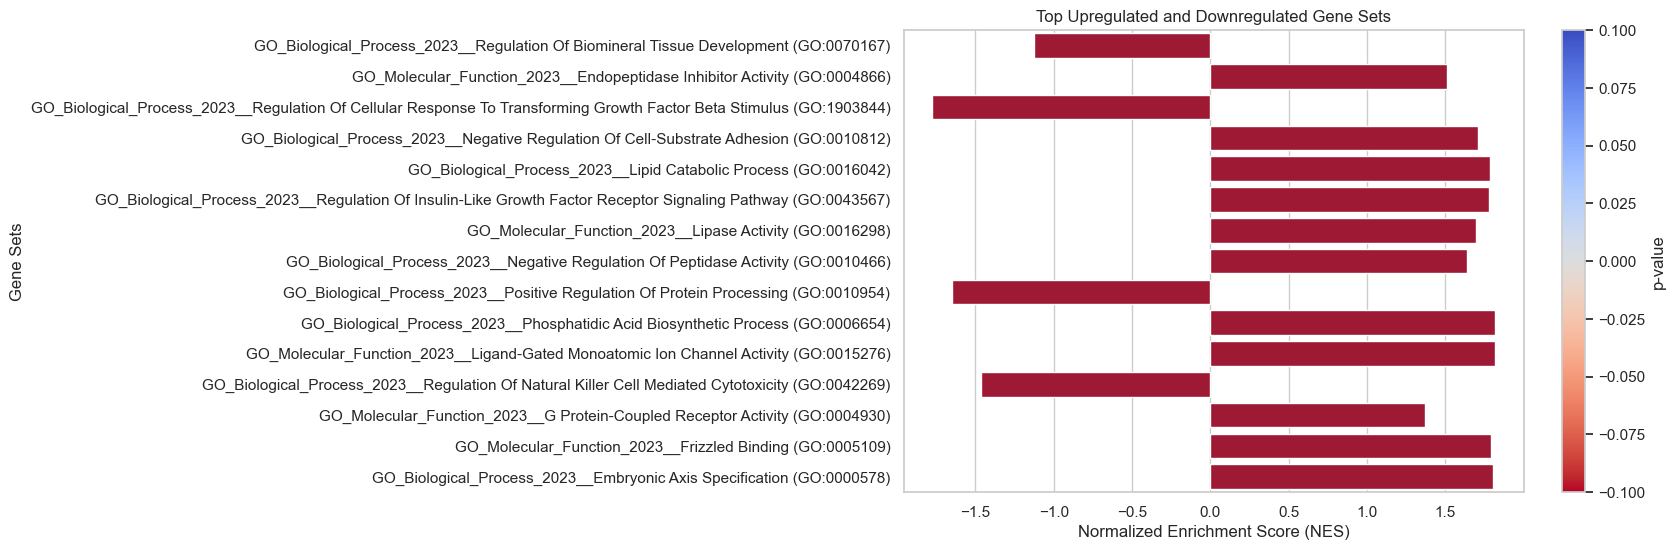

In [104]:
df_vis = df[:15]

plt.figure(figsize=(10, 6))
norm = plt.Normalize(df_vis['pval'].min(), df_vis['pval'].max())
colors = plt.cm.coolwarm_r(norm(df_vis['pval']))
bars = sns.barplot(x='nes', y='Term', data=df_vis, palette=colors)
plt.colorbar(plt.cm.ScalarMappable(cmap='coolwarm_r', norm=norm), ax=bars, label='p-value')
plt.xlabel('Normalized Enrichment Score (NES)')
plt.ylabel('Gene Sets')
plt.title('Top Upregulated and Downregulated Gene Sets')
plt.show()

/Users/emmachen/anaconda3/envs/cbio/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


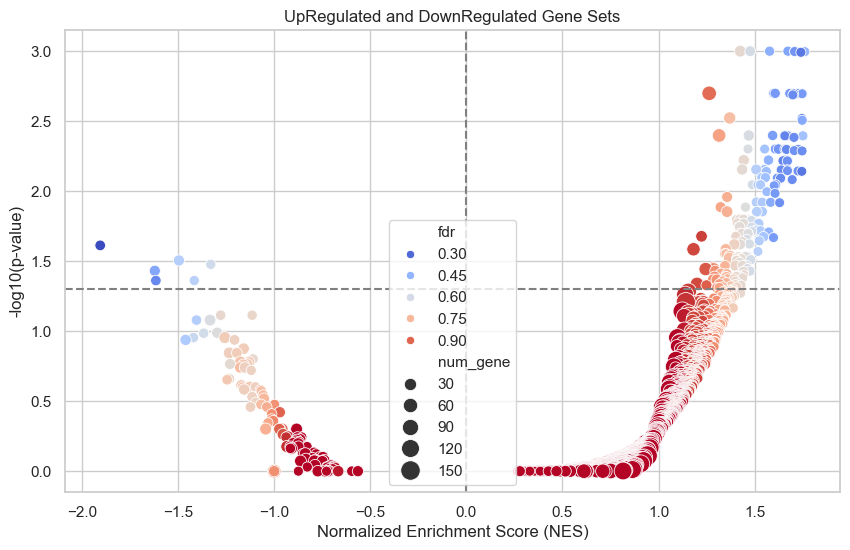

In [105]:
# Add a column for the -log10(p-value)
df['-log10(pval)'] = -np.log10(df['pval'])

# Volcano plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nes', y='-log10(pval)', hue='fdr', size='num_gene', sizes=(50, 200), data=df, palette='coolwarm')
plt.xlabel('Normalized Enrichment Score (NES)')
plt.ylabel('-log10(p-value)')
plt.title('UpRegulated and DownRegulated Gene Sets')
plt.axhline(y=-np.log10(0.05), color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')
plt.show()

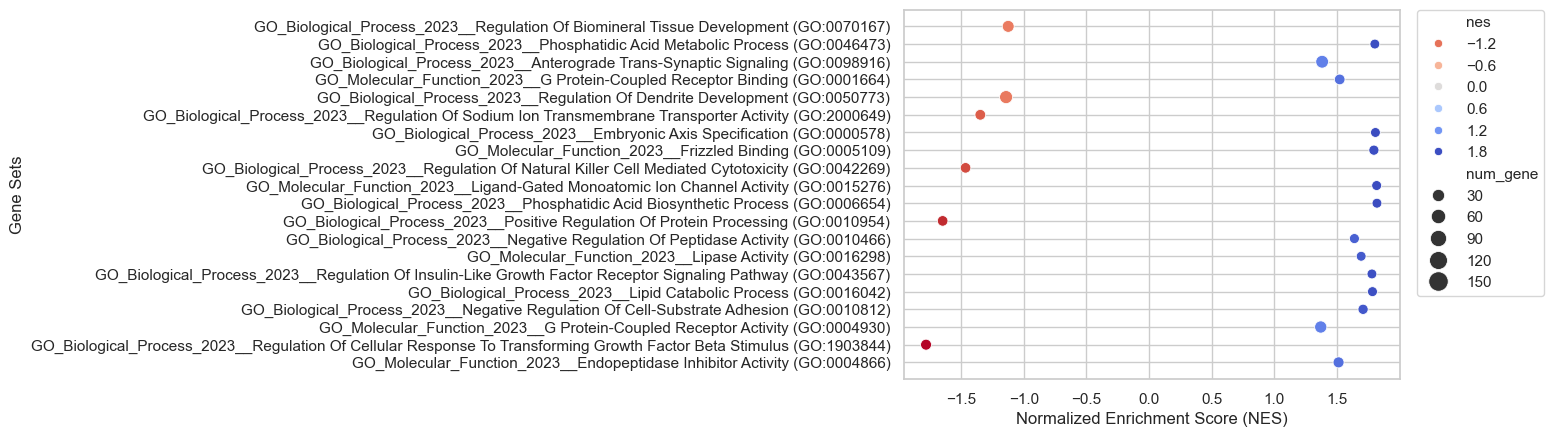

In [108]:
df_vis = df[:20]
ax = sns.scatterplot(data=df_vis, x="nes", y="Term", hue="nes", size=df['num_gene'], palette='coolwarm_r', sizes=(50, 200))
ax.set_xlabel('Normalized Enrichment Score (NES)')
ax.set_ylabel('Gene Sets')
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.02, 1.02))
